In [18]:
pip install pandas numpy matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
data = pd.read_csv("C:\\Users\\irem\\Desktop\\creditcard.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

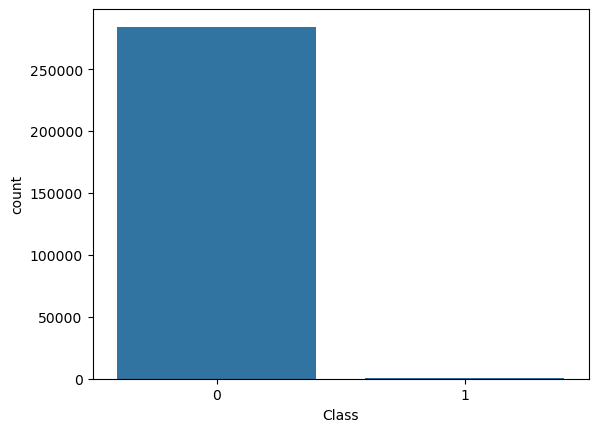

In [21]:
#KEŞİFSELVERİANALİZİ

# Veri setinin yapısını anlamak için
print(data.info())

# Her sütunun özet istatistiklerini görmek için
print(data.describe())

# Hedef değişkenin (Class) dağılımını incele
print(data['Class'].value_counts())

# Veri görselleştirme için Matplotlib ve Seaborn kullanabilirsin
import matplotlib.pyplot as plt
import seaborn as sns

# Örnek: Sınıfların dağılımını görselleştirmek için
sns.countplot(x='Class', data=data)
plt.show()



In [22]:
#VERİÖNİŞLEME

# Eksik verileri kontrol et
print(data.isnull().sum())

# Veriyi eğitim ve test setlerine böl
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)  # Özellikler
y = data['Class']  # Hedef değişken

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [23]:
#MODEL EĞİTME(GÖZETİMLİ ÖĞRENME) Gözetimli öğrenme için LOJİSTİK REGRESYON MODELİ 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Modeli eğit
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Tahmin yap ve doğruluğu ölç
y_pred = model.predict(X_test)
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))

# Karışıklık matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)



Doğruluk Skoru: 0.9990519995786665
[[56853    11]
 [   43    55]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#MODEL EĞİTME(GÖZETİMSİZ ÖĞRENME) gözetmsiz öğrenme için k-Means algortimasını kullandım.

from sklearn.cluster import KMeans

# Modeli eğit
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Sonuçları görüntüle
print(kmeans.labels_)


[0 0 0 ... 1 1 1]


In [25]:
#Modeldeğerlendirme 

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962

